Testes com os dados do covid no ES

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn 
seaborn.set()

df = pd.read_csv('https://bi.static.es.gov.br/covid19/MICRODADOS.csv', sep = ';', encoding = 'iso8859_15')

In [2]:
df.columns

Index(['DataNotificacao', 'DataCadastro', 'DataDiagnostico',
       'DataColeta_RT_PCR', 'DataColetaTesteRapido', 'DataEncerramento',
       'DataObito', 'Classificacao', 'Evolucao', 'CriterioConfirmacao',
       'StatusNotificacao', 'Municipio', 'Bairro', 'FaixaEtaria',
       'IdadeNaDataNotificacao', 'Sexo', 'RacaCor', 'Escolaridade', 'Febre',
       'DificuldadeRespiratoria', 'Tosse', 'Coriza', 'DorGarganta', 'Diarreia',
       'Cefaleia', 'ComorbidadePulmao', 'ComorbidadeCardio',
       'ComorbidadeRenal', 'ComorbidadeDiabetes', 'ComorbidadeTabagismo',
       'ComorbidadeObesidade', 'FicouInternado', 'ViagemBrasil',
       'ViagemInternacional', 'ProfissionalSaude'],
      dtype='object')

In [3]:
data_obitos = df['DataObito'].sort_values().dropna().to_numpy().astype(np.datetime64)
data_obitos = data_obitos[len(data_obitos)%7:len(data_obitos)]
dias = df['DataObito'].sort_values().dropna().drop_duplicates().to_numpy().astype(np.datetime64)
dias = dias[len(dias)%7:len(dias)]

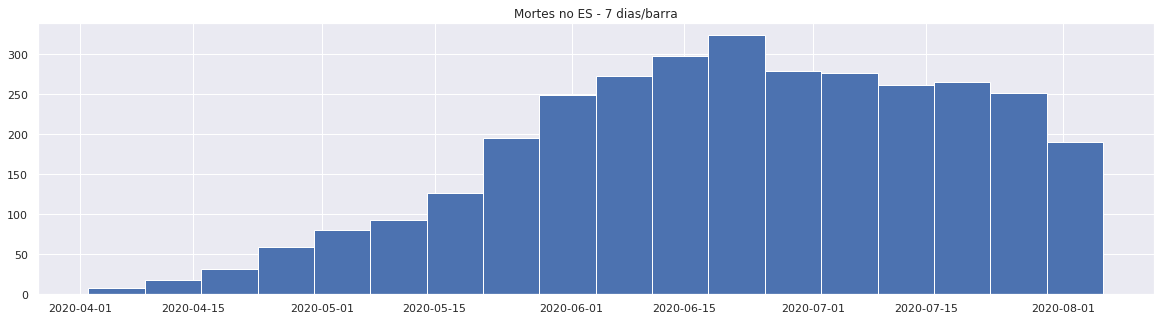

In [4]:
plt.figure(figsize = (20,5))
plt.hist(data_obitos, len(dias)//7)
plt.title('Mortes no ES - 7 dias/barra')
plt.show()

In [5]:
cidades = df['Municipio'].sort_values().drop_duplicates().to_numpy()

In [6]:
gv = ['VITORIA', 'VILA VELHA', 'CARIACICA', 'SERRA', 'VIANA']
df2 = df[df['Municipio'].isin(gv)]

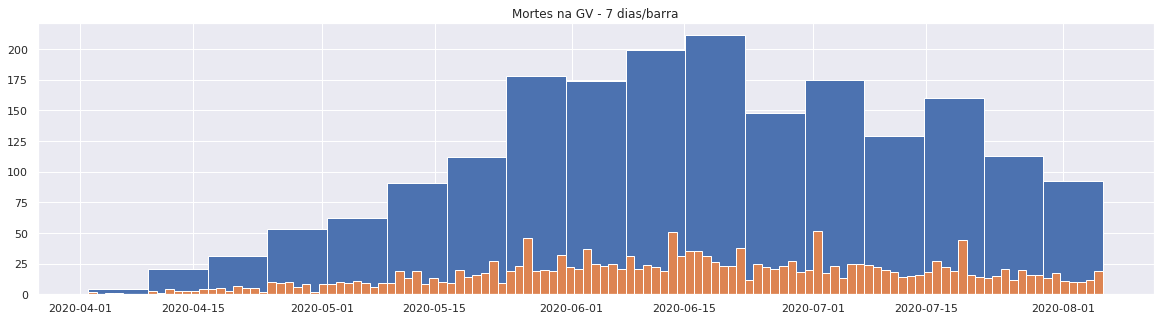

In [7]:
data_obitos2 = df2['DataObito'].sort_values().dropna().to_numpy().astype(np.datetime64)
data_obitos2 = data_obitos2[len(data_obitos2)%7:len(data_obitos2)]
dias2 = df2['DataObito'].sort_values().dropna().drop_duplicates().to_numpy().astype(np.datetime64)
dias2 = dias2[len(dias2)%7:len(dias2)]

plt.figure(figsize = (20,5))
plt.hist(data_obitos2, len(dias2)//7)
plt.hist(data_obitos2, len(dias2))
plt.title('Mortes na GV - 7 dias/barra')
plt.show()

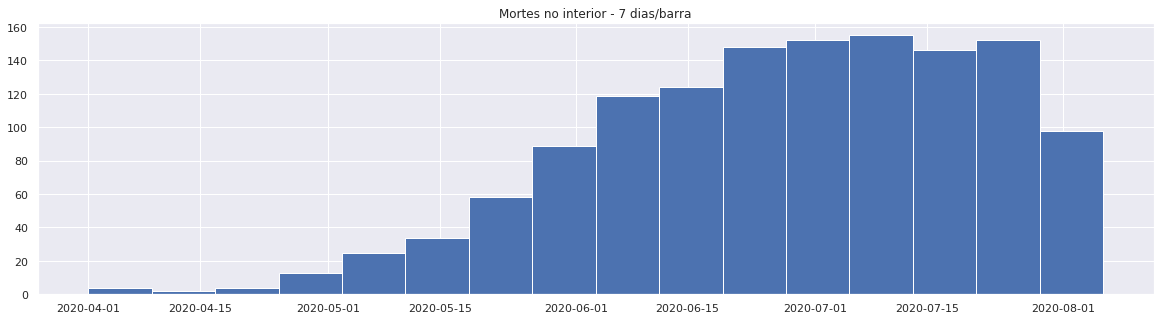

In [8]:
df3 = df[~df['Municipio'].isin(gv)]

data_obitos3 = df3['DataObito'].sort_values().dropna().to_numpy().astype(np.datetime64)
data_obitos3 = data_obitos3[len(data_obitos3)%7:len(data_obitos3)]
dias3 = df3['DataObito'].sort_values().dropna().drop_duplicates().to_numpy().astype(np.datetime64)
dias3 = dias3[len(dias3)%7:len(dias3)]

plt.figure(figsize = (20,5))
plt.hist(data_obitos3, len(dias3)//7)
plt.title('Mortes no interior - 7 dias/barra')
plt.show()

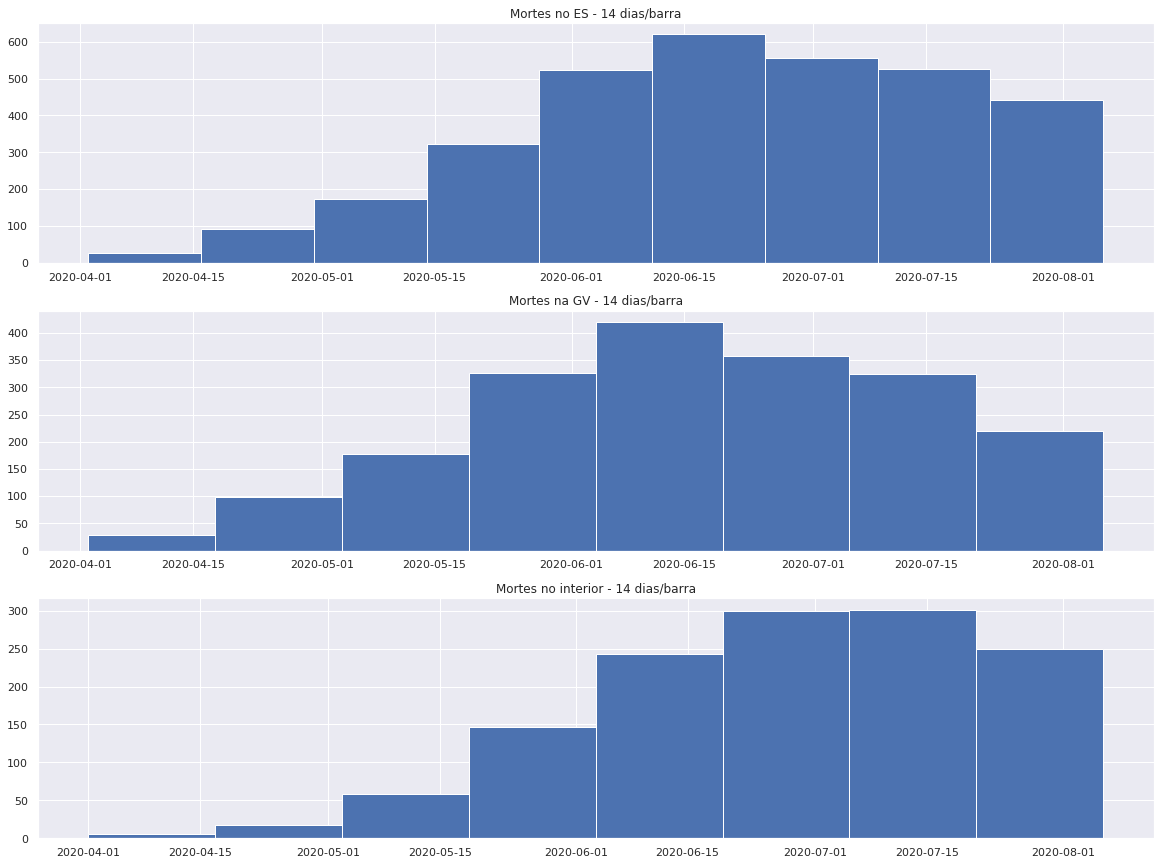

In [9]:
tam=14

plt.figure(figsize = (20,15))

plt.subplot(3,1,1)
plt.hist(data_obitos, len(dias)//tam)
plt.title('Mortes no ES - '+str(tam)+' dias/barra')

plt.subplot(3,1,2)
plt.hist(data_obitos2, len(dias2)//tam)
plt.title('Mortes na GV - '+str(tam)+' dias/barra')

plt.subplot(3,1,3)
plt.hist(data_obitos3, len(dias3)//tam)
plt.title('Mortes no interior - '+str(tam)+' dias/barra')

plt.show()

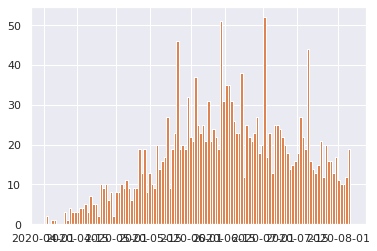

In [10]:
data2_pontos = plt.hist(data_obitos2, len(dias2))
data2_pontos2 = plt.hist(data_obitos2, len(dias2))

In [11]:
data2_pontos[0]

array([ 2.,  0.,  1.,  1.,  0.,  0.,  0.,  3.,  1.,  4.,  3.,  3.,  3.,
        4.,  4.,  5.,  3.,  7.,  5.,  5.,  2., 10.,  9., 10.,  6.,  8.,
        2.,  8.,  8., 10.,  9., 11.,  9.,  6.,  9.,  9., 19., 13., 19.,
        8., 13., 10.,  9., 20., 14., 16., 17., 27.,  9., 19., 23., 46.,
       19., 20., 19., 32., 22., 21., 37., 25., 23., 25., 21., 31., 21.,
       24., 22., 19., 51., 31., 35., 35., 31., 26., 23., 23., 38., 12.,
       25., 22., 21., 23., 27., 18., 20., 52., 17., 23., 13., 25., 25.,
       24., 22., 20., 18., 14., 15., 16., 18., 27., 22., 19., 44., 16.,
       14., 13., 15., 21., 12., 20., 16., 16., 13., 17., 11., 10., 10.,
       12., 19.])

In [25]:
# GUARDE BEM ESTA FUNÇÃO

def running_mean(x, N):
    cumsum = np.cumsum(np.insert(x, 0, 0)) 
    return (cumsum[N:] - cumsum[:-N]) / float(N)

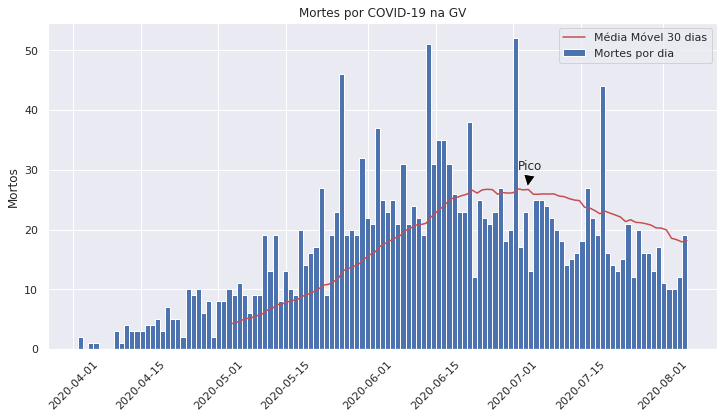

In [107]:
dianal = 30
running_mean(data2_pontos[0], dianal)

plt.figure(figsize = (12,6))
plt.hist(data_obitos2, len(dias2))
#plt.plot(np.delete(data2_pontos2[1],np.arange(7)), running_mean(data2_pontos[0], 7), color = 'r')
#plt.plot(np.delete(data2_pontos2[1],np.arange(14)), running_mean(data2_pontos[0], 14), color = 'r')
plt.plot(np.delete(data2_pontos2[1],np.arange(dianal)), running_mean(data2_pontos[0], dianal), color = 'r')
plt.title('Mortes por COVID-19 na GV')
# para o annotate: coordenada de xy devem estar de acordo com os eixos plotados (int, float, str)
plt.annotate('Pico', xy = ('2020-07-04',27), xytext = ('2020-07-02',30),arrowprops=dict(facecolor='black', shrink=0.05))
plt.ylabel('Mortos')
plt.xticks(rotation = 45)
plt.legend(['Média Móvel '+str(dianal)+' dias','Mortes por dia'])
plt.show()

In [83]:
running_mean(data2_pontos[0], 30).shape

(90,)

In [82]:
np.argmax(running_mean(data2_pontos[0], 30))

56

In [90]:
dias2[85]

119

In [87]:
119-90+56
len(dias2)-len()running_mean(data2_pontos[0], 30)

85